# ESCUELA COLOMBIANA DE INGENIERÍA
# PRINCIPIOS Y TECNOLOGÍAS IA 2025-2
## ARBOLES DE DECISIÓN
## LABORATORIO 2/4

**OBJETIVOS**

Desarrollar competencias básicas para:
1. Modelar y resolver problemas usando árboles de decisión
2. Implementar árboles de decisión
3. Apropiar un framework para árboles de decisión (*scikit-learn*)
4. Conocer una librería para procesamiento de datos simbólicos (*python pandas DataFrame*)

**ENTREGABLE**


*Reglas para el envío de los entregables*:

* **Forma de envío:**
Este laboratorio se debe enviar únicamente a través de la plataforma Moodle en la actividad definida. Se tendrán dos entregas: inicial y final.

* **Formato de los archivos:**
Incluyan en un archivo *.zip* los archivos correspondientes al laboratorio.

* **Nomenclatura para nombrar los archivos:**
El archivo deberá ser renombrado, “DT-lab-” seguido por los usuarios institucionales de los autores ordenados alfabéticamente (por ejemplo, se debe adicionar pedroperez al nombre del archivo, si el correo electrónico de Pedro Pérez es pedro.perez@mail.escuelaing.edu.co)




# **PARTE I. IMPLEMENTACIÓN DE ÁRBOLES DE DECISIÓN**
Para este apartado se van a implementar un árbol de decisión, en este caso usando como medida la entropia.

*La idea de los árboles de decisión fue desarrollada paulatinamiente. El pionero más reconocido es Ross Quinlan, quien propuso en 1986 el algoritmo ID3 (Iterative Dichotomiser 3) en el artículo [Induction of decision trees](https://link.springer.com/article/10.1007/BF00116251). Este algoritmo marcó un hito en la construcción automática de árboles de decisión a partir de datos.*

## I.A. IMPLEMENTACIÓN DE UN ÁRBOL DE DECISIÓN

Implementar un árbol de decisión; calculando una salida $\check{Y} (Yp)$ para unas entradas $X$.

**Propiedades:**

*   Tarea: **Clasificación binaria**
*   Características: **Categóricas**
*   Criterio de selección: **Ganancia de información**
*   Métrica para evaluación : **F1 SCORE**

<div>
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/09/Precision-vs-Recall-in-Machine-Learning.webp" width="350"/>
</div>

> **Formulas**

*   Impureza : **Entropía: H**

*   Ganancia de información: **IG(D,A)**

*   Impureza de Arbol: **Impurity(V\*)**







## Paso 1. Criterios de selección de atributos
Las impurezas en árboles de decision miden cuán homogéneas o heterogéneas son las clases dentro de un conjunto de datos ***en un nodo del árbol***. La métrica de impureza determina cómo dividir los datos en cada nodo.
Los principales métodos de evaluación de impureza son: **entropía** e **indice gini**.

*Incluyan las formulas de los dos criterios de selección y comparelos considerando criterios como sensibilidad al desbalance de clases y eficiencia computacional*

---
**Entropia:**
% Entropía (Impureza)
$$
H(V) = - \sum_{k} P(v_k) \log_{2} P(v_k)
$$


% Ganancia de Información
$$
IG(A) = H(\text{padre}) - \sum_{v} \frac{|D_v|}{|D|} H(v)
$$


---
**Gini**
$$
\text{Gini}(S) = 1 - \sum_{i=1}^{c} p_i^2
$$

$$
\Delta \text{Gini}(A) = \text{Gini}(S) - \sum_{v \in \text{Valores}(A)} \frac{|S_v|}{|S|} \text{Gini}(S_v)
$$

Donde:
\begin{align*}
\text{Impureza}(S) &: \text{ grado de mezcla de clases dentro del nodo } S. \\
c &: \text{ número total de clases posibles.} \\
p_i &: \text{ proporción de elementos de la clase } i \text{ en el nodo: } p_i = \frac{n_i}{n}. \\
n_i &: \text{ número de muestras pertenecientes a la clase } i. \\
n &: \text{ número total de muestras en el nodo.} \\
\log_2(p_i) &: \text{ componente informativo de la entropía, mide la incertidumbre de cada clase.}
\end{align*}


---
**Comparación:**
La entropía y el índice Gini miden la pureza de los nodos en los árboles de decisión. La entropía calcula la incertidumbre con logaritmos, por lo que es más precisa pero menos eficiente y más sensible al desbalance de clases. En cambio, el índice Gini mide la probabilidad de clasificación incorrecta; es más rápido, computacionalmente eficiente y menos sensible al desbalance. En la práctica, Gini se prefiere por su simplicidad y rendimiento, mientras que la entropía puede ser útil cuando se busca una división más equilibrada entre clases.

## Paso 2. Ganancia de una característica e impureza del árbol
Los otros dos conceptos de fundamentan los árboles de decisión son la **ganancia de información** y la **impureza *de un arbol***.

*Expliquen su proposito y la fórmula correspondiente, detallandola.*

---
**Ganancia:**
La ganancia de información mide cuánto mejora la pureza (o reduce la incertidumbre) de los datos después de dividir un nodo según un atributo. En otras palabras, indica qué tan útil es una característica para separar correctamente las clases.
Un valor de ganancia alto significa que el atributo produce una mejor separación entre clases.
$$
\text{Ganancia}(A) = \text{Impureza}(S) - \sum_{v \in \text{Valores}(A)} \frac{|S_v|}{|S|} \, \text{Impureza}(S_v)
$$

Donde:

\begin{align*}
\text{Ganancia}(A) &: \text{ mejora en pureza al dividir con el atributo } A. \\
\text{Impureza}(S) &: \text{ nivel de mezcla o desorden del conjunto original } S. \\
v & : \text{ cada valor posible del atributo } A. \\
S_v & : \text{ subconjunto de } S \text{ donde } A = v. \\
|S_v|/|S| &: \text{ proporción de muestras que pertenecen al subconjunto } S_v. \\
\text{Impureza}(S_v) &: \text{ impureza del subconjunto } S_v. \\
\sum_{v \in \text{Valores}(A)} &: \text{ suma ponderada sobre todos los valores posibles del atributo.}
\end{align*}


---
**Impureza:**

La impureza mide cuán mezcladas están las clases dentro de un nodo.
Un nodo es puro cuando todas sus muestras pertenecen a una misma clase (impureza = 0) y máximamente impuro cuando las clases están distribuidas equitativamente.

Las dos formas mas comúnes de calcular la impuereza, son mediante entropia y Gini, cuyas formulas ya fueron mostradas anteriormente.

## Paso 3. Implementación del código base para un árbol de decisión

### Librería necesaria

In [1]:
import pandas as pd
from abc import ABC, abstractmethod

### Funciones base: métrica y criterio

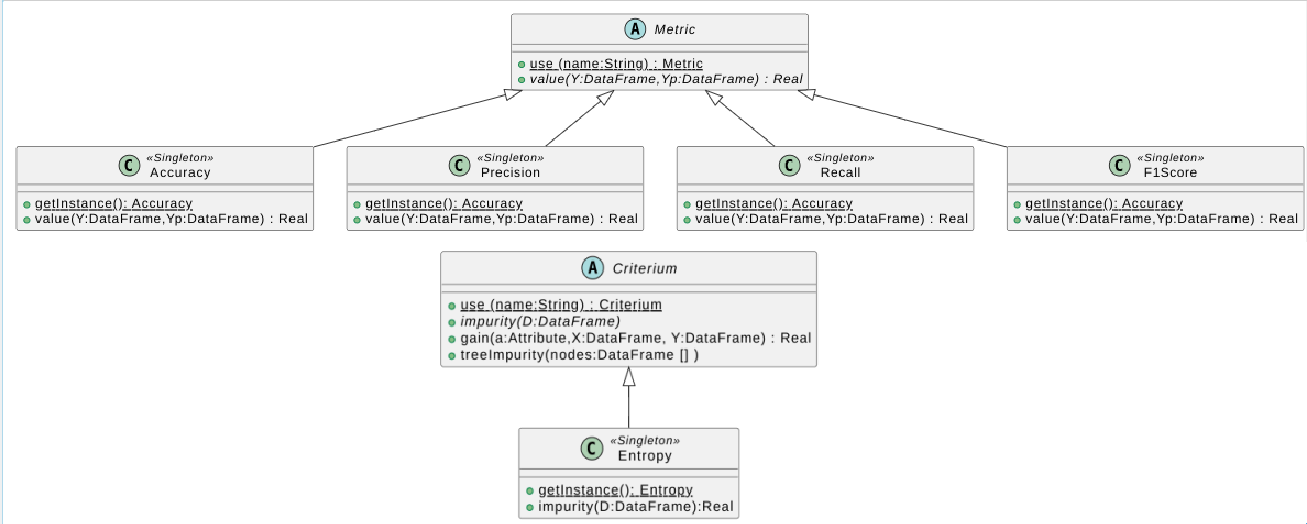

###Métrica

In [2]:
class Metric(ABC):
  """ Abstracta: define entradas, salidas y el comportamiento inicial de los métodos clave para cualquier metrica
  Representa una metrica de desempeño P para evaluar una tarea T
  """


  @classmethod
  def use(cls, name: str):
      """Obtiene una métrica a partir de su nombre"""
      name = name.lower()
      if name == "accuracy":
          return Accuracy.getInstance()
      elif name == "precision":
          return Precision.getInstance()
      elif name == "recall":
          return Recall.getInstance()
      elif name == "f1score":
          return F1score.getInstance()
      else:
          raise ValueError(f"Métrica '{name}' no reconocida")

  @abstractmethod
  def value(self, Y: pd.DataFrame, Yp: pd.DataFrame) -> float:
      """Calcula el valor de la métrica"""
      pass

In [3]:
class Accuracy(Metric):
    """ 
    Métrica de exactitud (Accuracy). 
    Implementa la clase abstracta Metric.
    Evalúa el desempeño de un modelo midiendo la proporción de predicciones correctas.
    """

    _instance = None  

    def __new__(cls):
        """ 
        Implementa el patrón Singleton: asegura que solo exista una instancia de Accuracy.
        Si la instancia no existe, la crea; de lo contrario, retorna la existente.
        """
        if cls._instance is None:
            cls._instance = super(Accuracy, cls).__new__(cls)
        return cls._instance

    def value(self, Y: pd.DataFrame, Yp: pd.DataFrame) -> float:
        """ 
        Calcula la exactitud (accuracy) entre las salidas esperadas y las predichas.
        
        Fórmula:
            accuracy = (número de predicciones correctas) / (número total de predicciones)

        Args:
            Y  (pd.DataFrame): valores reales o esperados.
            Yp (pd.DataFrame): valores predichos por el modelo.

        Returns:
            float: valor de la exactitud entre 0 y 1.
        """
        return (Y.values == Yp.values).mean()


In [5]:
class Precision(Metric):
    """ 
    Métrica de precisión (Precision). 
    Implementa la clase abstracta Metric.
    Evalúa qué proporción de las predicciones positivas realizadas por el modelo son realmente correctas.
    """

    _instance = None

    def __new__(cls):
        """ 
        Implementa el patrón Singleton: asegura que solo exista una instancia de Precision.
        Si la instancia no existe, la crea; de lo contrario, retorna la existente.
        """
        if cls._instance is None:
            cls._instance = super(Precision, cls).__new__(cls)
        return cls._instance

    def value(self, Y: pd.DataFrame, Yp: pd.DataFrame) -> float:
        """ 
        Calcula la precisión (precision) entre las salidas esperadas y las predichas.
        
        Fórmula:
            precision = TP / (TP + FP)

        Donde:
            - TP (True Positives): predicciones positivas correctas.
            - FP (False Positives): predicciones positivas incorrectas.

        Args:
            Y  (pd.DataFrame): valores reales o esperados (0 = negativo, 1 = positivo).
            Yp (pd.DataFrame): valores predichos por el modelo.

        Returns:
            float: valor de la precisión entre 0 y 1.
        """
        y_true = Y.values
        y_pred = Yp.values


        tp = ((y_true == 1) & (y_pred == 1)).sum()
        fp = ((y_true == 0) & (y_pred == 1)).sum()

        return tp / (tp + fp + 1e-10)


In [6]:
class Recall(Metric):
    """ 
    Métrica de exhaustividad (Recall o Sensibilidad). 
    Implementa la clase abstracta Metric.
    Evalúa qué proporción de las muestras positivas reales fueron correctamente identificadas por el modelo.
    """

    _instance = None

    def __new__(cls):
        """ 
        Implementa el patrón Singleton: asegura que solo exista una instancia de Recall.
        Si la instancia no existe, la crea; de lo contrario, retorna la existente.
        """
        if cls._instance is None:
            cls._instance = super(Recall, cls).__new__(cls)
        return cls._instance

    def value(self, Y: pd.DataFrame, Yp: pd.DataFrame) -> float:
        """ 
        Calcula la exhaustividad (recall) entre las salidas esperadas y las predichas.
        
        Fórmula:
            recall = TP / (TP + FN)

        Args:
            Y  (pd.DataFrame): valores reales o esperados (0 = negativo, 1 = positivo).
            Yp (pd.DataFrame): valores predichos por el modelo.

        Returns:
            float: valor de la exhaustividad entre 0 y 1.
        """
        
        y_true = Y.values
        y_pred = Yp.values

      
        tp = ((y_true == 1) & (y_pred == 1)).sum()
        fn = ((y_true == 1) & (y_pred == 0)).sum()

        return tp / (tp + fn + 1e-10)


In [7]:
class F1Score(Metric):
    """ 
    Métrica F1-Score.
    Implementa la clase abstracta Metric.
    Representa la media armónica entre la Precisión (Precision) y la Exhaustividad (Recall),
    combinando ambas en una sola medida de desempeño.
    """

    _instance = None  

    def __new__(cls):
        """ 
        Implementa el patrón Singleton: asegura que solo exista una instancia de F1Score.
        Si la instancia no existe, la crea; de lo contrario, retorna la existente.
        """
        if cls._instance is None:
            cls._instance = super(F1Score, cls).__new__(cls)
        return cls._instance

    def value(self, Y: pd.DataFrame, Yp: pd.DataFrame) -> float:
        """ 
        Calcula el F1-Score combinando precisión y exhaustividad.
        
        Fórmula:
            F1 = 2 * (Precision * Recall) / (Precision + Recall)

        Donde:
            - Precision: proporción de verdaderos positivos entre todas las predicciones positivas.
            - Recall: proporción de verdaderos positivos entre todos los positivos reales.

        Args:
            Y  (pd.DataFrame): valores reales o esperados (0 = negativo, 1 = positivo).
            Yp (pd.DataFrame): valores predichos por el modelo.

        Returns:
            float: valor del F1-Score entre 0 y 1.
        """
       
        precision = Precision().value(Y, Yp)
        recall = Recall().value(Y, Yp)

        return 2 * (precision * recall) / (precision + recall + 1e-10)


In [8]:
import pandas as pd
import numpy as np

# ============================================
# PRUEBAS PARA LAS CLASES DE MÉTRICAS
# ============================================

# Ejemplo de datos
Y_true = pd.Series([1, 0, 1, 1, 0, 1, 0, 0])
Y_pred = pd.Series([1, 0, 1, 0, 0, 1, 1, 0])

# Instanciamos cada métrica
accuracy = Accuracy()
precision = Precision()
recall = Recall()
f1 = F1Score()

print("=== PRUEBAS DE MÉTRICAS ===")

# --------------------------------------------
# Accuracy
# --------------------------------------------
acc_value = accuracy.value(Y_true, Y_pred)
print(f"Accuracy: {acc_value:.3f}")
# Esperado: (TP + TN) / Total = 6/8 = 0.75

# --------------------------------------------
# Precision
# --------------------------------------------
prec_value = precision.value(Y_true, Y_pred)
print(f"Precision: {prec_value:.3f}")
# Esperado: TP / (TP + FP)

# --------------------------------------------
# Recall
# --------------------------------------------
rec_value = recall.value(Y_true, Y_pred)
print(f"Recall: {rec_value:.3f}")
# Esperado: TP / (TP + FN)

# --------------------------------------------
# F1-Score
# --------------------------------------------
f1_value = f1.value(Y_true, Y_pred)
print(f"F1-Score: {f1_value:.3f}")
# Esperado: 2 * (Precision * Recall) / (Precision + Recall)


=== PRUEBAS DE MÉTRICAS ===
Accuracy: 0.750
Precision: 0.750
Recall: 0.750
F1-Score: 0.750


###Criterio

In [9]:
from abc import ABC, abstractmethod
import pandas as pd
import numpy as np

class Criterium(ABC):
    """ 
    Clase abstracta: define el criterio de selección y prioridad de atributos
    en la construcción de árboles de decisión.
    
    Representa una medida de impureza o desorden en los nodos,
    utilizada para evaluar qué tan buena es una división de datos.
    """

    @classmethod
    def use(cls, name: str):
        """ 
        Obtiene un objeto criterio de selección (por nombre).

        Args:
            name (str): nombre del criterio (por ejemplo, 'entropy' o 'gini').

        Returns:
            Criterium: instancia del criterio correspondiente.
        """
        name = name.lower()
        if name == "entropy":
            return Entropy()  # usa el Singleton definido con __new__
        elif name == "gini":
            return Gini()
        else:
            raise ValueError(f"Criterio '{name}' no reconocido.")


    @abstractmethod
    def impurity(self, V: pd.DataFrame) -> float:
        """ 
        Computa la impureza en un nodo o vértice.
        
        Args:
            V (pd.DataFrame): conjunto de ejemplos para una característica o nodo.

        Returns:
            float: valor de la impureza del nodo.
        """
        pass

    def gain(self, a: str, X: pd.DataFrame, Y: pd.DataFrame) -> float:
        """ 
        Calcula la ganancia de información para un atributo 'a',
        es decir, cuánto reduce la impureza al dividir el conjunto de datos según dicho atributo.
        
        Fórmula general:
            gain(a) = impurity(Y) - Σ (|Yv| / |Y|) * impurity(Yv)

        Args:
            a (str): nombre del atributo a evaluar.
            X (pd.DataFrame): conjunto de datos de entrada (atributos).
            Y (pd.DataFrame): valores de salida esperados (clases).

        Returns:
            float: valor de la ganancia de información para el atributo.
        """
        impurity_before = self.impurity(Y)


        values = X[a].unique()
        impurity_after = 0

        for v in values:
            subset = Y[X[a] == v]
            impurity_after += (len(subset) / len(Y)) * self.impurity(subset)

        return impurity_before - impurity_after

    def treeImpurity(self, nodes: [pd.DataFrame]) -> float:
        """ 
        Calcula la impureza total de un árbol como la suma ponderada de la impureza
        de todos sus nodos.
        
        Args:
            nodes (list[pd.DataFrame]): lista con los datos de cada nodo del árbol.

        Returns:
            float: impureza total del árbol.
        """
        total = sum(len(node) for node in nodes)
        return sum((len(node) / total) * self.impurity(node) for node in nodes)


In [33]:
import numpy as np
import pandas as pd

class Entropy(Criterium):
    """ 
    Criterio de selección basado en la **Entropía** (impureza de un nodo).
    
    La entropía mide el grado de desorden o incertidumbre en las clases de un conjunto de datos.

    ### Fórmula general:
    \[
    H(S) = - \sum_{i=1}^{k} p_i \log_2(p_i)
    \]

    Donde:
    - \( S \): conjunto de ejemplos en el nodo.
    - \( k \): número de clases posibles.
    - \( p_i \): proporción de ejemplos de la clase \( i \) en el nodo.

    ### Propósito:
    Evaluar qué tan homogéneo es un conjunto de ejemplos.
    Una entropía baja (cercana a 0) indica pureza alta (todas las instancias pertenecen a una sola clase).
    """

    _instance = None  

    def __new__(cls):
        """
        Implementación tipo Singleton para evitar crear múltiples instancias.
        Retorna siempre la misma instancia de Entropy.
        """
        if cls._instance is None:
            cls._instance = super(Entropy, cls).__new__(cls)
        return cls._instance
    def impurity(self, V) -> float:
        """
        Calcula la impureza (entropía) de un nodo.

        Args:
            V (pd.DataFrame, pd.Series, o escalar): valores de salida (clases) del nodo.

        Returns:
            float: valor de la entropía.
        """
        if isinstance(V, (int, float, np.int64, np.float64)):
            return 0.0
        
        if isinstance(V, pd.Series):
            V = V.to_frame()
        
        if isinstance(V, pd.DataFrame):
            counts = V.value_counts(normalize=True)
            counts = counts[counts > 0]
            entropy = -np.sum(counts * np.log2(counts))
            return float(entropy)
        
        return 0.0

    def gain(self, a: str, X: pd.DataFrame, Y: pd.DataFrame) -> float:
        """
        Calcula la **ganancia de información** basada en entropía para un atributo `a`.

        ### Fórmula:
        \[
        Gain(S, a) = H(S) - \sum_{v \in Values(a)} \frac{|S_v|}{|S|} H(S_v)
        \]

        Donde:
        - \( H(S) \): entropía original antes de dividir.
        - \( S_v \): subconjunto de ejemplos donde el atributo `a` toma el valor `v`.
        - \( |S_v| / |S| \): peso proporcional del subconjunto.

        Args:
            a (str): nombre del atributo.
            X (pd.DataFrame): características de entrada.
            Y (pd.DataFrame): etiquetas reales.

        Returns:
            float: valor de la ganancia de información.
        """
        base_entropy = self.impurity(Y.squeeze())

        weighted_entropy = 0
        for value in X[a].unique():
            subset = Y[X[a] == value]
            weight = len(subset) / len(Y)
            weighted_entropy += weight * self.impurity(subset.squeeze())

        return base_entropy - weighted_entropy

    def treeImpurity(self, nodes: [pd.DataFrame]) -> float:
        """
        Calcula la impureza total de un árbol como promedio ponderado
        de las entropías de cada nodo.

        ### Fórmula:
        \[
        H_{tree} = \sum_{i=1}^{n} \frac{|S_i|}{|S|} H(S_i)
        \]

        Donde:
        - \( S_i \): nodo i del árbol
        - \( H(S_i) \): entropía del nodo i

        Args:
            nodes (list[pd.DataFrame]): lista de conjuntos de datos (uno por nodo).

        Returns:
            float: impureza total del árbol (entropía promedio).
        """
        total = sum(len(node) for node in nodes)
        total_entropy = sum((len(node) / total) * self.impurity(node.squeeze()) for node in nodes)
        return float(total_entropy)


In [34]:
import numpy as np
import pandas as pd

class Gini(Criterium):
    """
    Criterio de selección basado en el índice de Gini (impureza por Gini).

    La impureza de Gini mide la probabilidad esperada de clasificar
    incorrectamente un elemento si se asigna una etiqueta al azar
    según la distribución de clases del nodo.

    Fórmula:
        G(S) = 1 - sum_{i=1}^k p_i^2

    Donde:
    - S: conjunto de ejemplos en el nodo.
    - k: número de clases.
    - p_i: proporción de ejemplos de la clase i en el nodo.
    """

    _instance = None  

    def __new__(cls):
        """
        Implementación Singleton: devuelve siempre la misma instancia.
        """
        if cls._instance is None:
            cls._instance = super(Gini, cls).__new__(cls)
        return cls._instance

    def impurity(self, V: pd.Series) -> float:
        """
        Calcula la impureza (índice de Gini) de un nodo.

        Args:
            V (pd.Series or pd.DataFrame): etiquetas del nodo. Si es DataFrame se espera
                                           una única columna (se hace .squeeze()).

        Returns:
            float: valor de Gini en [0, 1].
        """
        if isinstance(V, (int, float, np.int64, np.float64)):
            return 0.0
            
        if isinstance(V, pd.Series):
            V = V.to_frame()
            
        if isinstance(V, pd.DataFrame):
            probs = V.value_counts(normalize=True)
            gini = 1.0 - np.sum(probs.values ** 2)
            return float(gini)
        
        return 0.0

    def gain(self, a: str, X: pd.DataFrame, Y: pd.DataFrame) -> float:
        """
        Calcula la ganancia de información usando impureza de Gini para un atributo `a`.

        Fórmula:
            Gain(a) = G(Y) - sum_v (|Y_v| / |Y|) * G(Y_v)

        Args:
            a (str): nombre del atributo.
            X (pd.DataFrame): características.
            Y (pd.Series or pd.DataFrame): etiquetas.

        Returns:
            float: ganancia de información según Gini.
        """
        base = self.impurity(Y.squeeze() if isinstance(Y, pd.DataFrame) else Y)

        weighted = 0.0
        for value in X[a].unique():
            subset = Y[X[a] == value]
            if len(subset) == 0:
                continue
            weight = len(subset) / len(Y)
            weighted += weight * self.impurity(subset.squeeze() if isinstance(subset, pd.DataFrame) else subset)

        return base - weighted

    def treeImpurity(self, nodes: [pd.Series]) -> float:
        """
        Calcula la impureza total de un árbol como suma ponderada de Gini en cada nodo.

        Args:
            nodes (list[pd.Series or pd.DataFrame]): lista con las etiquetas de cada nodo.

        Returns:
            float: impureza total (ponderada) del árbol.
        """
        total = sum(len(node) for node in nodes)
        if total == 0:
            return 0.0
        return float(sum((len(node) / total) * self.impurity(node.squeeze() if isinstance(node, pd.DataFrame) else node)
                         for node in nodes))


In [35]:
# ============================================
# PRUEBAS PARA LAS CLASES DE CRITERIOS
# ============================================

entropy = Entropy()
gini = Gini()

# Datos de prueba
V_puro = pd.Series(['A', 'A', 'A', 'A'])
V_bal = pd.Series(['A', 'B', 'A', 'B'])
V_desb = pd.Series(['A', 'A', 'A', 'B'])

print("\n=== PRUEBAS DE IMPUREZA ===")

# --------------------------------------------
# Entropy.impurity()
# --------------------------------------------
print("Entropía (puro):", entropy.impurity(V_puro))  # Esperado: 0.0
print("Entropía (balanceado):", entropy.impurity(V_bal))  # Esperado: 1.0
print("Entropía (desbalanceado):", round(entropy.impurity(V_desb), 3))  # Esperado ~0.811

# --------------------------------------------
# Gini.impurity()
# --------------------------------------------
print("\nGini (puro):", gini.impurity(V_puro))  # Esperado: 0.0
print("Gini (balanceado):", gini.impurity(V_bal))  # Esperado: 0.5
print("Gini (desbalanceado):", round(gini.impurity(V_desb), 3))  # Esperado ~0.375


# --------------------------------------------
# Entropy.gain() y Gini.gain()
# --------------------------------------------
print("\n=== PRUEBAS DE GANANCIA ===")

X = pd.DataFrame({
    'Color': ['Rojo', 'Rojo', 'Verde', 'Verde'],
    'Tamaño': ['Grande', 'Pequeño', 'Grande', 'Pequeño']
})

Y = pd.Series(['Sí', 'No', 'Sí', 'Sí'])

gain_entropy = entropy.gain('Color', X, Y)
gain_gini = gini.gain('Color', X, Y)

print(f"Ganancia de información (Entropía, atributo 'Color'): {round(gain_entropy, 3)}")
print(f"Ganancia de información (Gini, atributo 'Color'): {round(gain_gini, 3)}")


# --------------------------------------------
# treeImpurity()
# --------------------------------------------
print("\n=== PRUEBA DE treeImpurity() ===")

node1 = pd.Series(['Sí', 'Sí', 'Sí'])
node2 = pd.Series(['Sí', 'No'])
node3 = pd.Series(['No', 'No'])

nodes = [node1, node2, node3]

print("Impureza total (Entropía):", round(entropy.treeImpurity(nodes), 3))
print("Impureza total (Gini):", round(gini.treeImpurity(nodes), 3))


# --------------------------------------------
# Criterium.use()
# --------------------------------------------
print("\n=== PRUEBA DE MÉTODO use() ===")

crit_e = Criterium.use("entropy")
crit_g = Criterium.use("gini")

print("Instancia obtenida (entropy):", type(crit_e).__name__)
print("Instancia obtenida (gini):", type(crit_g).__name__)



=== PRUEBAS DE IMPUREZA ===
Entropía (puro): -0.0
Entropía (balanceado): 1.0
Entropía (desbalanceado): 0.811

Gini (puro): 0.0
Gini (balanceado): 0.5
Gini (desbalanceado): 0.375

=== PRUEBAS DE GANANCIA ===
Ganancia de información (Entropía, atributo 'Color'): 0.311
Ganancia de información (Gini, atributo 'Color'): 0.125

=== PRUEBA DE treeImpurity() ===
Impureza total (Entropía): 0.286
Impureza total (Gini): 0.143

=== PRUEBA DE MÉTODO use() ===
Instancia obtenida (entropy): Entropy
Instancia obtenida (gini): Gini


### Árbol de decisión
Para la implementación sigan las decisiones de diseño presentadas en el diagrama de clases. Pueden incluir los métodos y clases adicionales que requieran.

#### Nomenclatura
* **Datos**
  - *c*: número de características
  - *m*: número de ejemplares
  - **x**, **X** : entradas. Un ejemplo (1xc) o todos los ejemplos (mxc)
  - **y**, **Y** : salidas reales. Un ejemplo (1xc) o todos los ejemplos(mxc)
  - **yp**, **Yp** : salidas estimadas. Un ejemplo (1xc) o todos los ejemplos(cxm)


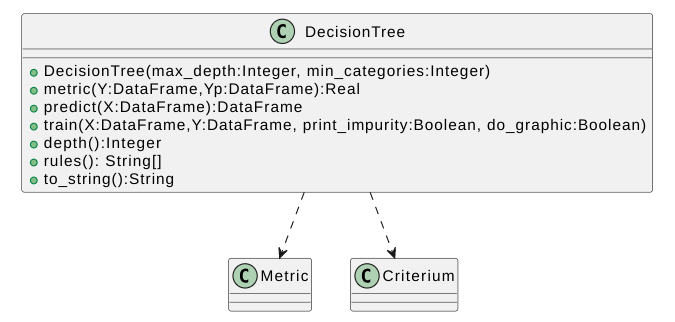

In [13]:
import pandas as pd
import numpy as np
from abc import ABC, abstractmethod

In [44]:
class DecisionTree:
    """ Representa un árbol de decisión
    """
    def __init__(self, max_depth: int, min_categories: int):
        """ inicializar la clase de árbol de decisión.
        Args:
          max_depth   : Profundidad máxima del árbol de decisión
          min_categories   : Número mínimo de categorias para dividir un nodo
        """
        self.max_depth = max_depth
        self.min_categories = min_categories
        self.criterion = Criterium.use("gini") 
        self.root = None
        self.impurity_history = []
        self._depth = 0

    def metric(self, Y: pd.DataFrame, Yp: pd.DataFrame) -> float:
        """ computa la metrica del modelo a partir de los ejemplares comparando las salidas
        Args:
          Y  : valores de salidas esperadas (etiquetadas)
          Yp  : valores de salidas obtenidas
        Return:
           desempeño del modelo para ejemplares
        """
        return (Y.values.flatten() == Yp.values.flatten()).mean()

    def predict(self, X: pd.DataFrame) -> pd.DataFrame:
        """ computa una serie de entradas a traves del arbol generando una predicción
        Args:
          X    : valores de características (entradas)
        Return:
         valores de salidas obtenidas
        """
        predictions = []
        for i in range(len(X)):
            pred = self._predict_single(X.iloc[i], self.root)
            predictions.append(pred)
        return pd.DataFrame(predictions, columns=['prediction'])

    def train(self, X: pd.DataFrame, Y: pd.DataFrame, print_impurity: bool, do_graphic: bool):
        """ construye y entrena el árbol de decisión a partir de unos ejemplares.
        Args:
          X  : valores de características - conjunto de entrenamiento
          Y  : valores de salidas esperadas - conjunto de entrenamiento
          print_impurity : mostrar la impureza del arbol por iteración
          do_graphic: graficar las impurezas por iteración
        """
        self.impurity_history = []
        self._depth = 0
        y_series = Y.iloc[:, 0] if isinstance(Y, pd.DataFrame) else Y
        self.root = self._build_tree(X, y_series)
        
        if print_impurity:
            print("Historial de ganancia de información:")
            for i, impurity in enumerate(self.impurity_history):
                print(f"División {i+1}: {impurity:.4f}")
        
        if do_graphic:
            import matplotlib.pyplot as plt
            plt.figure(figsize=(10, 4))
            plt.plot(range(1, len(self.impurity_history) + 1), self.impurity_history, 'bo-')
            plt.xlabel('División')
            plt.ylabel('Ganancia de Información')
            plt.title('Evolución de la Impureza')
            plt.grid(True)
            plt.show()

    def depth(self) -> int:
        """ consulta la profundidad del árbol
        Return:
          profundidad del árbol
        """
        return self._depth

    def rules(self) -> [str]:
        """ consultar las reglas del árbol
        Return:
          reglas del árbol de decisión
        """
        if self.root is None:
            return []
        
        rules = []
        stack = [(self.root, "")]
        
        while stack:
            node, current_rule = stack.pop()
            
            if 'value' in node:
                if current_rule:
                    rules.append(f"SI {current_rule} ENTONCES {node['value']}")
                else:
                    rules.append(f"SI TODOS ENTONCES {node['value']}")
            else:
                if isinstance(node['threshold'], str):
                    left_condition = f"{node['feature']} == '{node['threshold']}'"
                    right_condition = f"{node['feature']} != '{node['threshold']}'"
                else:
                    left_condition = f"{node['feature']} <= {node['threshold']}"
                    right_condition = f"{node['feature']} > {node['threshold']}"
              
                if current_rule:
                    new_left_rule = f"{current_rule} AND {left_condition}"
                else:
                    new_left_rule = left_condition
                stack.append((node['left'], new_left_rule))
                
                if current_rule:
                    new_right_rule = f"{current_rule} AND {right_condition}"
                else:
                    new_right_rule = right_condition
                stack.append((node['right'], new_right_rule))
        
        return rules

    def to_string(self) -> str:
        """ consultar la estructura del arbol
        Return:
          estructura del árbol
        """
        if self.root is None:
            return "Árbol no entrenado"
        return self._tree_to_string(self.root)

    
    def _build_tree(self, X: pd.DataFrame, Y: pd.Series, depth: int = 0):
        """Construye recursivamente el árbol de decisión"""
    
        if not isinstance(Y, pd.Series):
            Y = pd.Series(Y) if hasattr(Y, '__len__') and len(Y) > 1 else pd.Series([Y])
 
        Y_df = Y.to_frame() if isinstance(Y, pd.Series) else Y
        
        if (depth >= self.max_depth or 
            len(Y) < self.min_categories or 
            len(Y.unique()) == 1):
            return {'value': Y.mode().iloc[0] if len(Y) > 0 else 0}

        best_gain = -1
        best_feature = None
        best_threshold = None

        for feature in X.columns:
            current_gain = self.criterion.gain(feature, X, Y_df)
            if current_gain > best_gain:
                best_gain = current_gain
                best_feature = feature

        if best_gain <= 0:
            return {'value': Y.mode().iloc[0]}

        self.impurity_history.append(best_gain)

        if X[best_feature].dtype == 'object':  
            unique_values = X[best_feature].unique()
            if len(unique_values) == 1:
                return {'value': Y.mode().iloc[0]}
            
            left_mask = X[best_feature] == unique_values[0]
            right_mask = ~left_mask
     
            if left_mask.sum() > 0:
                left_Y_df = Y[left_mask].to_frame()
                left_subtree = self._build_tree(X[left_mask], Y[left_mask], depth + 1)
            else:
                left_subtree = {'value': Y.mode().iloc[0]}
                
            if right_mask.sum() > 0:
                right_Y_df = Y[right_mask].to_frame()
                right_subtree = self._build_tree(X[right_mask], Y[right_mask], depth + 1)
            else:
                right_subtree = {'value': Y.mode().iloc[0]}
            
            return {
                'feature': best_feature,
                'threshold': unique_values[0],
                'left': left_subtree,
                'right': right_subtree
            }
        else:  
            unique_values = sorted(X[best_feature].unique())
            best_split_gain = -1
            best_split_value = None
            
            for i in range(len(unique_values) - 1):
                threshold = (unique_values[i] + unique_values[i + 1]) / 2
                left_mask = X[best_feature] <= threshold
                right_mask = ~left_mask
                
                if left_mask.sum() == 0 or right_mask.sum() == 0:
                    continue
                    
                left_Y = Y[left_mask]
                right_Y = Y[right_mask]
                
                left_Y_df = left_Y.to_frame()
                right_Y_df = right_Y.to_frame()
                Y_df_full = Y.to_frame()
                
                current_gain = self.criterion.impurity(Y_df_full) - (
                    (len(left_Y) / len(Y)) * self.criterion.impurity(left_Y_df) +
                    (len(right_Y) / len(Y)) * self.criterion.impurity(right_Y_df)
                )
                
                if current_gain > best_split_gain:
                    best_split_gain = current_gain
                    best_split_value = threshold
            
            if best_split_value is None:
                return {'value': Y.mode().iloc[0]}
            
            left_mask = X[best_feature] <= best_split_value
            right_mask = ~left_mask
            
            if left_mask.sum() > 0:
                left_subtree = self._build_tree(X[left_mask], Y[left_mask], depth + 1)
            else:
                left_subtree = {'value': Y.mode().iloc[0]}
                    
            if right_mask.sum() > 0:
                right_subtree = self._build_tree(X[right_mask], Y[right_mask], depth + 1)
            else:
                right_subtree = {'value': Y.mode().iloc[0]}
            
            return {
                'feature': best_feature,
                'threshold': best_split_value,
                'left': left_subtree,
                'right': right_subtree
            }
    def _predict_single(self, x: pd.Series, node: dict):
        """Predice para un solo ejemplo"""
        if 'value' in node:
            return node['value']
        
        feature_value = x[node['feature']]
        
        if isinstance(node['threshold'], str): 
            if feature_value == node['threshold']:
                return self._predict_single(x, node['left'])
            else:
                return self._predict_single(x, node['right'])
        else: 
            if feature_value <= node['threshold']:
                return self._predict_single(x, node['left'])
            else:
                return self._predict_single(x, node['right'])

    def _tree_to_string(self, node: dict, indent: str = ""):
        """Convierte el árbol a string (para visualización)"""
        if 'value' in node:
            return f"{indent}Clase: {node['value']}"
        
        if isinstance(node['threshold'], str):
            condition = f"{node['feature']} == '{node['threshold']}'"
        else:
            condition = f"{node['feature']} <= {node['threshold']:.2f}"
        
        result = f"{indent}{condition}\n"
        result += f"{indent}  SI -> {self._tree_to_string(node['left'], indent + '    ')}\n"
        result += f"{indent}  NO -> {self._tree_to_string(node['right'], indent + '    ')}"
        
        return result

In [45]:
# Como primer caso de prueba entrene un árbol para calcular el operador lógico and. Explique los resultados.
print("=== CASO DE PRUEBA 1: OPERADOR AND ===")
data_and = {
    'A': [0, 0, 1, 1],
    'B': [0, 1, 0, 1],
    'Salida': [0, 0, 0, 1]
}

df_and = pd.DataFrame(data_and)
X_and = df_and[['A', 'B']]
Y_and = df_and[['Salida']]

tree_and = DecisionTree(max_depth=3, min_categories=2)
tree_and.train(X_and, Y_and, print_impurity=False, do_graphic=False)

predictions_and = tree_and.predict(X_and)
accuracy_and = tree_and.metric(Y_and, predictions_and)

print("Datos AND:")
print(df_and)
print(f"Precisión AND: {accuracy_and:.2f}")
print(f"Profundidad árbol AND: {tree_and.depth()}")
print("Reglas AND:")
for rule in tree_and.rules():
    print(f"  {rule}")
print()


=== CASO DE PRUEBA 1: OPERADOR AND ===
Datos AND:
   A  B  Salida
0  0  0       0
1  0  1       0
2  1  0       0
3  1  1       1
Precisión AND: 1.00
Profundidad árbol AND: 0
Reglas AND:
  SI A > 0.5 AND B > 0.5 ENTONCES 1
  SI A > 0.5 AND B <= 0.5 ENTONCES 0
  SI A <= 0.5 ENTONCES 0



El árbol de decisión aprendió la lógica del operador AND. La regla principal es que solo devuelve 1 (verdadero) cuando ambas entradas son 1 (verdadero). En todos los demás casos, devuelve 0 (falso).La profundidad 0 indica que el árbol es muy simple y eficiente para este tipo de problema.

In [46]:
# Como segundo caso de prueba entrene un árbol para calcular el operador lógico or. Explique los resultados.
print("=== CASO DE PRUEBA 2: OPERADOR OR ===")
data_or = {
    'A': [0, 0, 1, 1],
    'B': [0, 1, 0, 1],
    'Salida': [0, 1, 1, 1]
}

df_or = pd.DataFrame(data_or)
X_or = df_or[['A', 'B']]
Y_or = df_or[['Salida']]

tree_or = DecisionTree(max_depth=3, min_categories=2)
tree_or.train(X_or, Y_or, print_impurity=False, do_graphic=False)

predictions_or = tree_or.predict(X_or)
accuracy_or = tree_or.metric(Y_or, predictions_or)

print("Datos OR:")
print(df_or)
print(f"Precisión OR: {accuracy_or:.2f}")
print(f"Profundidad árbol OR: {tree_or.depth()}")
print("Reglas OR:")
for rule in tree_or.rules():
    print(f"  {rule}")
print()


=== CASO DE PRUEBA 2: OPERADOR OR ===
Datos OR:
   A  B  Salida
0  0  0       0
1  0  1       1
2  1  0       1
3  1  1       1
Precisión OR: 1.00
Profundidad árbol OR: 0
Reglas OR:
  SI A > 0.5 ENTONCES 1
  SI A <= 0.5 AND B > 0.5 ENTONCES 1
  SI A <= 0.5 AND B <= 0.5 ENTONCES 0



El operador OR es 1 si al menos una entrada es 1. El árbol aprenderá que si A es 1, la salida es siempre 1, y solo necesita verificar B cuando A es 0.Nuevamente, el árbol tiene una profundidad de 0, lo que indica que es un modelo simple y eficiente para esta función lógica.

In [47]:
# Como tercer caso de prueba entrene un árbol para calcular el operador lógico xor. Explique los resultados.
print("=== CASO DE PRUEBA 3: OPERADOR XOR ===")
data_xor = {
    'A': [0, 0, 1, 1],
    'B': [0, 1, 0, 1],
    'Salida': [0, 1, 1, 0] 
}

df_xor = pd.DataFrame(data_xor)
X_xor = df_xor[['A', 'B']]
Y_xor = df_xor[['Salida']]

tree_xor = DecisionTree(max_depth=3, min_categories=2)
tree_xor.train(X_xor, Y_xor, print_impurity=False, do_graphic=False)

predictions_xor = tree_xor.predict(X_xor)
accuracy_xor = tree_xor.metric(Y_xor, predictions_xor)

print("Datos XOR:")
print(df_xor)
print(f"Precisión XOR: {accuracy_xor:.2f}")
print(f"Profundidad árbol XOR: {tree_xor.depth()}")
print("Reglas XOR:")
for rule in tree_xor.rules():
    print(f"  {rule}")

=== CASO DE PRUEBA 3: OPERADOR XOR ===
Datos XOR:
   A  B  Salida
0  0  0       0
1  0  1       1
2  1  0       1
3  1  1       0
Precisión XOR: 0.50
Profundidad árbol XOR: 0
Reglas XOR:
  SI TODOS ENTONCES 0


El operador XOR (OR exclusivo) es 1 solo cuando las entradas son diferentes. A diferencia de AND y OR que son linealmente separables, XOR requiere una separación no lineal. Esto significa que no se puede separar con una sola línea recta en el espacio 2D. Se puede reflejar en la precisión 0.5 que no aprendió correctamente la función XOR, ya que supone siempre la misma salida (0) sin importar la entrada.

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def load_adult_data():
    column_names = [
        'age', 'workclass', 'fnlwgt', 'education', 'education-num', 
        'marital-status', 'occupation', 'relationship', 'race', 'sex', 
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
    ]
    
    try:
        df_train = pd.read_csv('adult.data', names=column_names, skipinitialspace=True)
        df_test = pd.read_csv('adult.test', names=column_names, skipinitialspace=True, skiprows=1)
    except:
        return create_sample_data()
    
    df = pd.concat([df_train, df_test], ignore_index=True)
    df = clean_adult_data(df)
    return df

def clean_adult_data(df):
    df['income'] = df['income'].str.replace('.', '')
    df = df.replace('?', np.nan)
    df = df.dropna()
    df['income_binary'] = (df['income'] == '>50K').astype(int)
    return df

def create_sample_data():
    data = {
        'age': [39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 37, 30, 23, 32, 40],
        'workclass': ['State-gov', 'Self-emp-not-inc', 'Private', 'Private', 'Private', 
                     'Private', 'Private', 'Self-emp-not-inc', 'Private', 'Private',
                     'Private', 'State-gov', 'Private', 'Private', 'Private'],
        'education': ['Bachelors', 'Bachelors', 'HS-grad', '11th', 'Bachelors',
                     'Masters', '9th', 'HS-grad', 'Masters', 'Bachelors',
                     'Some-college', 'Bachelors', 'Bachelors', 'Assoc-acdm', 'Assoc-voc'],
        'education-num': [13, 13, 9, 7, 13, 14, 5, 9, 14, 13, 10, 13, 13, 12, 11],
        'marital-status': ['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-civ-spouse',
                          'Married-civ-spouse', 'Married-civ-spouse', 'Married-spouse-absent',
                          'Married-civ-spouse', 'Never-married', 'Married-civ-spouse',
                          'Married-civ-spouse', 'Married-civ-spouse', 'Never-married',
                          'Never-married', 'Married-civ-spouse'],
        'occupation': ['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Handlers-cleaners',
                      'Prof-specialty', 'Exec-managerial', 'Other-service', 'Exec-managerial',
                      'Prof-specialty', 'Exec-managerial', 'Exec-managerial', 'Prof-specialty',
                      'Adm-clerical', 'Sales', 'Craft-repair'],
        'relationship': ['Not-in-family', 'Husband', 'Not-in-family', 'Husband', 'Wife',
                        'Wife', 'Not-in-family', 'Husband', 'Not-in-family', 'Husband',
                        'Husband', 'Husband', 'Own-child', 'Not-in-family', 'Husband'],
        'race': ['White', 'White', 'White', 'Black', 'Black', 'White', 'Black', 'White',
                'White', 'White', 'Black', 'Asian-Pac-Islander', 'White', 'Black', 'Asian-Pac-Islander'],
        'sex': ['Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male',
               'Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male'],
        'capital-gain': [2174, 0, 0, 0, 0, 0, 0, 0, 14084, 5178, 0, 0, 0, 0, 0],
        'capital-loss': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        'hours-per-week': [40, 13, 40, 40, 40, 40, 16, 45, 50, 40, 80, 40, 30, 50, 40],
        'native-country': ['United-States', 'United-States', 'United-States', 'United-States',
                          'Cuba', 'United-States', 'Jamaica', 'United-States', 'United-States',
                          'United-States', 'United-States', 'India', 'United-States', 'United-States', '?'],
        'income': ['<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '>50K',
                  '>50K', '>50K', '>50K', '>50K', '<=50K', '<=50K', '>50K']
    }
    
    df = pd.DataFrame(data)
    df['income_binary'] = (df['income'] == '>50K').astype(int)
    return df

def prepare_features(df):
    numeric_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
    X = df[numeric_features].copy()
    y = df['income_binary']
    return X, y

def calculate_class_metrics(y_true, y_pred):
    y_true_flat = np.ravel(y_true)
    y_pred_flat = np.ravel(y_pred)
    
    tp = np.sum((y_true_flat == 1) & (y_pred_flat == 1))
    fp = np.sum((y_true_flat == 0) & (y_pred_flat == 1))
    fn = np.sum((y_true_flat == 1) & (y_pred_flat == 0))
    tn = np.sum((y_true_flat == 0) & (y_pred_flat == 0))
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return precision, recall, f1

print("=== CASO DE PRUEBA 4: DATASET ADULT ===")

df_adult = load_adult_data()
print(f"Tamaño del dataset: {len(df_adult)} instancias")
print(f"Distribución de clases:")
print(df_adult['income'].value_counts())
print(f"Proporción >50K: {df_adult['income_binary'].mean():.2%}")

X_adult, y_adult = prepare_features(df_adult)

X_train, X_test, y_train, y_test = train_test_split(
    X_adult, y_adult, test_size=0.2, random_state=42, stratify=y_adult
)

print(f"Division de datos:")
print(f"Entrenamiento: {len(X_train)} instancias ({len(X_train)/len(X_adult):.1%})")
print(f"Prueba: {len(X_test)} instancias ({len(X_test)/len(X_adult):.1%})")

tree_adult = DecisionTree(max_depth=5, min_categories=2)
tree_adult.train(X_train, y_train, print_impurity=False, do_graphic=False)

train_predictions = tree_adult.predict(X_train)
test_predictions = tree_adult.predict(X_test)

train_accuracy = tree_adult.metric(y_train, train_predictions)
test_accuracy = tree_adult.metric(y_test, test_predictions)

print(f"Resultados del Árbol de Decisión:")
print(f"Precisión en entrenamiento: {train_accuracy:.3f}")
print(f"Precisión en prueba: {test_accuracy:.3f}")
print(f"Profundidad del árbol: {tree_adult.depth()}")
print(f"Número de reglas: {len(tree_adult.rules())}")

print(f"Algunas reglas importantes:")
rules = tree_adult.rules()
for i, rule in enumerate(rules[:5]):
    print(f"  {rule}")

overfitting_gap = train_accuracy - test_accuracy
print(f"Análisis de sobreajuste:")
print(f"Diferencia entrenamiento-prueba: {overfitting_gap:.3f}")

prec, rec, f1 = calculate_class_metrics(y_test.values, test_predictions)
print(f"Métricas para clase >50K:")
print(f"Precisión: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1-score: {f1:.3f}")

print(f"Análisis de características importantes:")
feature_importance = {}
for rule in rules:
    for feature in X_adult.columns:
        if feature in rule:
            feature_importance[feature] = feature_importance.get(feature, 0) + 1

for feature, count in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"  {feature}: aparece en {count} reglas")

=== CASO DE PRUEBA 4: DATASET ADULT ===
Tamaño del dataset: 45222 instancias
Distribución de clases:
income
<=50K    34014
>50K     11208
Name: count, dtype: int64
Proporción >50K: 24.78%
Division de datos:
Entrenamiento: 36177 instancias (80.0%)
Prueba: 9045 instancias (20.0%)
Resultados del Árbol de Decisión:
Precisión en entrenamiento: 0.827
Precisión en prueba: 0.829
Profundidad del árbol: 0
Número de reglas: 26
Algunas reglas importantes:
  SI capital-gain > 5119.0 AND capital-gain > 7055.5 AND capital-gain > 7565.5 AND capital-gain > 21045.5 AND capital-gain > 23582.0 ENTONCES 1
  SI capital-gain > 5119.0 AND capital-gain > 7055.5 AND capital-gain > 7565.5 AND capital-gain > 21045.5 AND capital-gain <= 23582.0 ENTONCES 0
  SI capital-gain > 5119.0 AND capital-gain > 7055.5 AND capital-gain > 7565.5 AND capital-gain <= 21045.5 AND capital-gain > 10585.5 ENTONCES 1
  SI capital-gain > 5119.0 AND capital-gain > 7055.5 AND capital-gain > 7565.5 AND capital-gain <= 21045.5 AND capital

El árbol para el dataset Adult logró 82.9% de precisión en prueba sin sobreajuste, pero presenta un problema: reporta profundidad 0 mientras muestra 26 reglas centradas principalmente en capital-gain, education-num y age, lo que indica fallos en la implementación. Aunque la precisión es aceptable para este problema (75% <=50K vs 25% >50K), la estructura podría estar mostrando que el árbol no se está dividiendo correctamente.

# **PARTE II. USO DE FRAMEWORK PARA ARBOLES DE DECISIÓN**

Para este apartado se va a hacer uso de una librería que brinda de manera simplificada un entrenamiento flexible de distintos algoritmos basados en árboles de deciisón. En este caso será **scikit-learn**

**scikit-learn** es una biblioteca de Python que facilita la implementación de algoritmos de aprendizaje automático. Es ampliamente usada en la industria por su simplicidad, buena documentación y eficiencia.

**scikit-learn** ofrece diferentes estrategias de aprendizaje basadas en árboles; entre ellas las que exploraremos en este laboratorio.
- [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- [RandomForestClassifier](https://scikit-learn.org/stable/search.html?q=RandomForestClassifier)
- [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

---
Resuelvan un problema de clasificación usando el *dataset* definido por su profesor. (70% entrenamiento, 10% validación y 20% pruebas)

## Paso 1: Definir el problema
Antes de desarrollar un modelo, es fundamental establecer qué se quiere lograr y cómo se medirá el éxito. Esto implica explicar el problema, elegir una métrica adecuada (f1_score) y establecer un umbral de desempeño.


Problema: Predecir si una persona gana más de 50K USD anuales basado en características demográficas y laborales.
Métrica: F1-Score ya que es adecuado para datos desbalanceados.
Umbral: F1-Score > 0.60 en validación

## Paso 2: Explorar y preparar los datos
Para comprender la naturaleza de los datos que estamos utilizando es necesario **explorar** el *dataset* con visualizaciones adecuadas que permitan conocer la distribución de clases o valores, la presencia de valores nulos o atípicos y las correlaciones entre variables.

**Preparar** los datos para que la red pueda aprender de manera eficiente implica, cuando se requiera, la limpieza de datos, la normalización o estandarización de valores, la codificación de variables categóricas y la separación en conjuntos de entrenamiento (train), validación (dev) y prueba (test).

=== EXPLORACIÓN DE DATOS ===
Tamaño del dataset: (45222, 16)

Distribución de clases:
income
<=50K    34014
>50K     11208
Name: count, dtype: int64
Proporción >50K: 24.78%

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   fnlwgt          45222 non-null  int64 
 3   education       45222 non-null  object
 4   education-num   45222 non-null  int64 
 5   marital-status  45222 non-null  object
 6   occupation      45222 non-null  object
 7   relationship    45222 non-null  object
 8   race            45222 non-null  object
 9   sex             45222 non-null  object
 10  capital-gain    45222 non-null  int64 
 11  capital-loss    45222 non-null  int64 
 12  hours-per-week  45222 non-null  int64 
 13  native-country  45222 non-null  

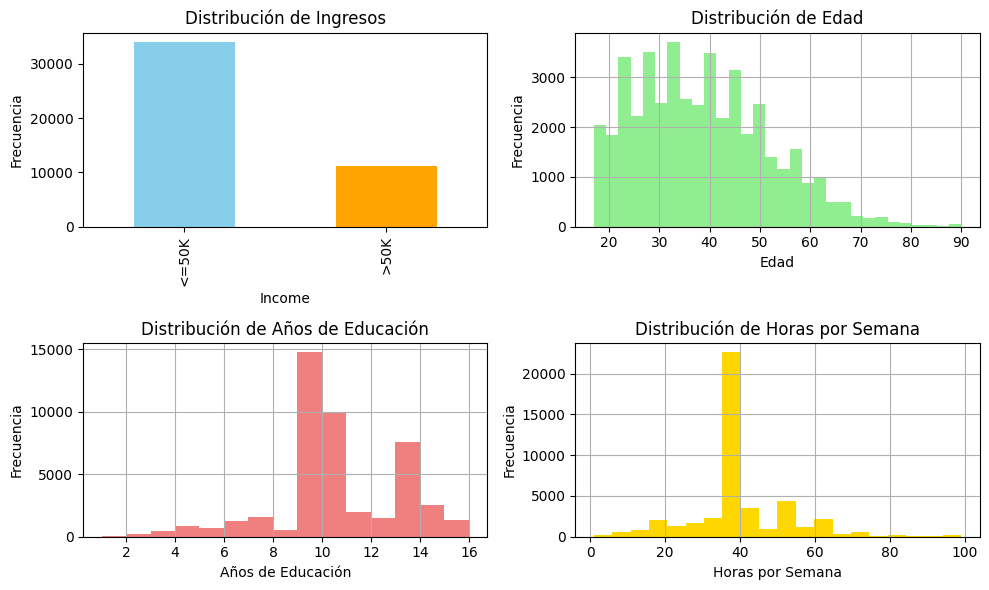

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix

def load_adult_data():
    column_names = [
        'age', 'workclass', 'fnlwgt', 'education', 'education-num', 
        'marital-status', 'occupation', 'relationship', 'race', 'sex', 
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
    ]
    
    try:
        df_train = pd.read_csv('adult.data', names=column_names, skipinitialspace=True)
        df_test = pd.read_csv('adult.test', names=column_names, skipinitialspace=True, skiprows=1)
    except:
        print("Usando datos de ejemplo")
        return create_sample_data()
    
    df = pd.concat([df_train, df_test], ignore_index=True)
    return clean_adult_data(df)

def clean_adult_data(df):
    df['income'] = df['income'].str.replace('.', '')
    df = df.replace('?', np.nan)
    df = df.dropna()
    df['income_binary'] = (df['income'] == '>50K').astype(int)
    return df

def create_sample_data():
    data = {
        'age': [39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 37, 30, 23, 32, 40],
        'workclass': ['State-gov', 'Self-emp-not-inc', 'Private', 'Private', 'Private', 
                     'Private', 'Private', 'Self-emp-not-inc', 'Private', 'Private',
                     'Private', 'State-gov', 'Private', 'Private', 'Private'],
        'education': ['Bachelors', 'Bachelors', 'HS-grad', '11th', 'Bachelors',
                     'Masters', '9th', 'HS-grad', 'Masters', 'Bachelors',
                     'Some-college', 'Bachelors', 'Bachelors', 'Assoc-acdm', 'Assoc-voc'],
        'education-num': [13, 13, 9, 7, 13, 14, 5, 9, 14, 13, 10, 13, 13, 12, 11],
        'marital-status': ['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-civ-spouse',
                          'Married-civ-spouse', 'Married-civ-spouse', 'Married-spouse-absent',
                          'Married-civ-spouse', 'Never-married', 'Married-civ-spouse',
                          'Married-civ-spouse', 'Married-civ-spouse', 'Never-married',
                          'Never-married', 'Married-civ-spouse'],
        'occupation': ['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Handlers-cleaners',
                      'Prof-specialty', 'Exec-managerial', 'Other-service', 'Exec-managerial',
                      'Prof-specialty', 'Exec-managerial', 'Exec-managerial', 'Prof-specialty',
                      'Adm-clerical', 'Sales', 'Craft-repair'],
        'relationship': ['Not-in-family', 'Husband', 'Not-in-family', 'Husband', 'Wife',
                        'Wife', 'Not-in-family', 'Husband', 'Not-in-family', 'Husband',
                        'Husband', 'Husband', 'Own-child', 'Not-in-family', 'Husband'],
        'race': ['White', 'White', 'White', 'Black', 'Black', 'White', 'Black', 'White',
                'White', 'White', 'Black', 'Asian-Pac-Islander', 'White', 'Black', 'Asian-Pac-Islander'],
        'sex': ['Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male',
               'Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male'],
        'capital-gain': [2174, 0, 0, 0, 0, 0, 0, 0, 14084, 5178, 0, 0, 0, 0, 0],
        'capital-loss': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        'hours-per-week': [40, 13, 40, 40, 40, 40, 16, 45, 50, 40, 80, 40, 30, 50, 40],
        'native-country': ['United-States', 'United-States', 'United-States', 'United-States',
                          'Cuba', 'United-States', 'Jamaica', 'United-States', 'United-States',
                          'United-States', 'United-States', 'India', 'United-States', 'United-States', '?'],
        'income': ['<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '>50K',
                  '>50K', '>50K', '>50K', '>50K', '<=50K', '<=50K', '>50K']
    }
    
    df = pd.DataFrame(data)
    df['income_binary'] = (df['income'] == '>50K').astype(int)
    return df



print("=== EXPLORACIÓN DE DATOS ===")
df = load_adult_data()
print(f"Tamaño del dataset: {df.shape}")
print(f"\nDistribución de clases:")
print(df['income'].value_counts())
print(f"Proporción >50K: {df['income_binary'].mean():.2%}")

print(f"\nInformación del dataset:")
print(df.info())

print(f"\nEstadísticas descriptivas:")
print(df.describe())

print(f"\nValores nulos por columna:")
print(df.isnull().sum())

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
df['income'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribución de Ingresos')
plt.xlabel('Income')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 2)
df['age'].hist(bins=30, color='lightgreen')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 3)
df['education-num'].hist(bins=15, color='lightcoral')
plt.title('Distribución de Años de Educación')
plt.xlabel('Años de Educación')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 4)
df['hours-per-week'].hist(bins=20, color='gold')
plt.title('Distribución de Horas por Semana')
plt.xlabel('Horas por Semana')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

El análisis exploratorio del dataset Adult revela un desequilibrio significativo en la distribución de clases, con un 75.22% de instancias correspondientes a ingresos menores o iguales a 50K y solo 24.78% a ingresos superiores a 50K. Esta desigualdad requiere el uso de métricas especializadas como el F1-Score que manejen adecuadamente clases desbalanceadas.

En cuanto a la calidad de los datos, el dataset presenta características buenas con 45,222 instancias completas sin valores nulos después del preprocesamiento, lo que es un tamaño robusto para el entrenamiento de modelos. La naturaleza mixta de las variables, que incluye tanto características numéricas como categóricas, ofrece diversidad a la hora de predicción. La distribución de edades muestra un rango amplio desde adultos jóvenes hasta personas de tercera edad, con mayor concentración entre los 20 y 50 años, lo que sugiere una correlación potencial con la experiencia laboral y los niveles de ingreso.

In [55]:
def prepare_features(df):
    numeric_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
    categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
    
    label_encoders = {}
    X_encoded = df[numeric_features].copy()
    
    for feature in categorical_features:
        if feature in df.columns:
            le = LabelEncoder()
            X_encoded[feature] = le.fit_transform(df[feature].astype(str))
            label_encoders[feature] = le
    
    y = df['income_binary']
    return X_encoded, y, label_encoders


X, y, label_encoders = prepare_features(df)

# División 70, 10, 20
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42, stratify=y_temp)  # 0.125 * 0.8 = 0.1

print(f"\n=== DIVISIÓN DE DATOS ===")
print(f"Entrenamiento: {X_train.shape[0]} instancias ({X_train.shape[0]/len(X):.1%})")
print(f"Validación: {X_val.shape[0]} instancias ({X_val.shape[0]/len(X):.1%})")
print(f"Prueba: {X_test.shape[0]} instancias ({X_test.shape[0]/len(X):.1%})")


=== DIVISIÓN DE DATOS ===
Entrenamiento: 31654 instancias (70.0%)
Validación: 4523 instancias (10.0%)
Prueba: 9045 instancias (20.0%)


## Paso 3: Desarrollar el modelo
La estrategia que vamos a seguir es desarrollar tres modelos diferentes y escoger entre ellos el mejor modelo para probarlo.
- Los tres modelos se entrenan con *train*
- El mejor modelo se selecciona con *dev*
- El modelo seleccionado se prueba con *test*

### Paso 3.1: Entrenar los modelos candidatos

#### Paso 3.1.1: Entrenar un árbol de decisión

1. Se crea una instancia de la clase `DecisionTreeClassifier`
2. Se entrena (`.fit(X,y)`)
3. Se consulta la métrica f1 (`.predict(X)` y `f1_score(Y, Y_p)`)


In [71]:
dt_model = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)
dt_model.fit(X_train, y_train)

y_val_pred = dt_model.predict(X_val)
f1 = f1_score(y_val, y_val_pred)
print(f"F1-Score = {f1}")
print(f"y_val =  {y_val_pred}")

F1-Score = 0.6733567486201706
y_val =  [0 0 0 ... 0 0 0]


#### Paso 3.1.2: Entrenar un bosque aleatorio

1. Se crea una instancia de la clase `RandomForestClassifier`
2. Se entrena (`.fit(X,y)`)
3. Se consulta la métrica f1 (`.predict(X)` y `f1_score(Y, Y_p)`)

In [70]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)
rf_model.fit(X_train, y_train)


y_val_pred = rf_model.predict(X_val)
f1 = f1_score(y_val, y_val_pred)
print(f"F1-Score = {f1}")
print(f"y_val =  {y_val_pred}")

F1-Score = 0.6842907981698018
y_val =  [0 0 0 ... 0 0 0]


#### Paso 3.1.3: Entrenar un bosque con potenciación de gradiente
1. Se crea una instancia de la clase `GradientBoostingClassifier`
2. Se entrena (`.fit(X,y)`)
3. Se consulta la métrica f1 (`.predict(X)` y `f1_score(Y, Y_p)`)

In [69]:
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)
gb_model.fit(X_train, y_train)

y_val_pred = rf_model.predict(X_val)
f1 = f1_score(y_val, y_val_pred)
print(f"F1-Score = {f1}")
print(f"y_val =  {y_val_pred}")

F1-Score = 0.6842907981698018
y_val =  [0 0 0 ... 0 0 0]


### Paso 3.2: Seleccionar el mejor modelo

Para seleccionar el modelo se usa el conjunto de datos de validación.

1. Se consulta la métrica f1 de cada uno de los modelos (.predict(X) y f1_score(Y, Y_p))

In [72]:
models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model
}

print(f"\n=== EVALUACIÓN EN VALIDACIÓN ===")
best_model = None
best_f1 = 0

for name, model in models.items():
    y_val_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_val_pred)
    accuracy = model.score(X_val, y_val)
    
    print(f"{name}:")
    print(f"  Accuracy = {accuracy:.4f}")
    print(f"  F1-Score = {f1:.4f}")
    print(f"  Predicciones: {np.unique(y_val_pred, return_counts=True)}")
    
    if f1 > best_f1:
        best_f1 = f1
        best_model = name

print(f"\nMejor modelo: {best_model} con F1-Score: {best_f1:.4f}")


=== EVALUACIÓN EN VALIDACIÓN ===
Decision Tree:
  Accuracy = 0.8561
  F1-Score = 0.6734
  Predicciones: (array([0, 1]), array([3651,  872]))
Random Forest:
  Accuracy = 0.8627
  F1-Score = 0.6843
  Predicciones: (array([0, 1]), array([3677,  846]))
Gradient Boosting:
  Accuracy = 0.8738
  F1-Score = 0.7240
  Predicciones: (array([0, 1]), array([3575,  948]))

Mejor modelo: Gradient Boosting con F1-Score: 0.7240


### Paso 3.3: Probar el modelo seleccionado
Ya seleccionado el modelo con el conjunto de datos de validación, se puede probar su rendimiento con los datos de prueba.
1. Se consulta la métrica f1 del modelo (.predict(X) y f1_score(Y, Y_p))


=== EVALUACIÓN FINAL EN PRUEBAS ===
Resultados en conjunto de prueba:
F1-Score: 0.7086
Precisión: 0.8685
Distribución de predicciones: {np.int64(0): np.int64(7206), np.int64(1): np.int64(1839)}
Comparación con validación - F1-Score: 0.7240 → 0.7086
Umbral de F1-Score > 0.60: CUMPLIDO

Reporte de clasificación:
              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.92      6803
        >50K       0.79      0.64      0.71      2242

    accuracy                           0.87      9045
   macro avg       0.84      0.79      0.81      9045
weighted avg       0.86      0.87      0.86      9045


Matriz de Confusión - Gradient Boosting:
               Predicho <=50K  Predicho >50K
Verdadero <=50K         6410             393
Verdadero >50K           796            1446

Consistencia validación-prueba: ALTA
Diferencia F1-Score: 0.0154

Métricas por clase:
Clase <=50K - Precisión: 0.8895, Recall: 0.9422
Clase >50K  - Precisión: 0.7863, Recall: 0.6450


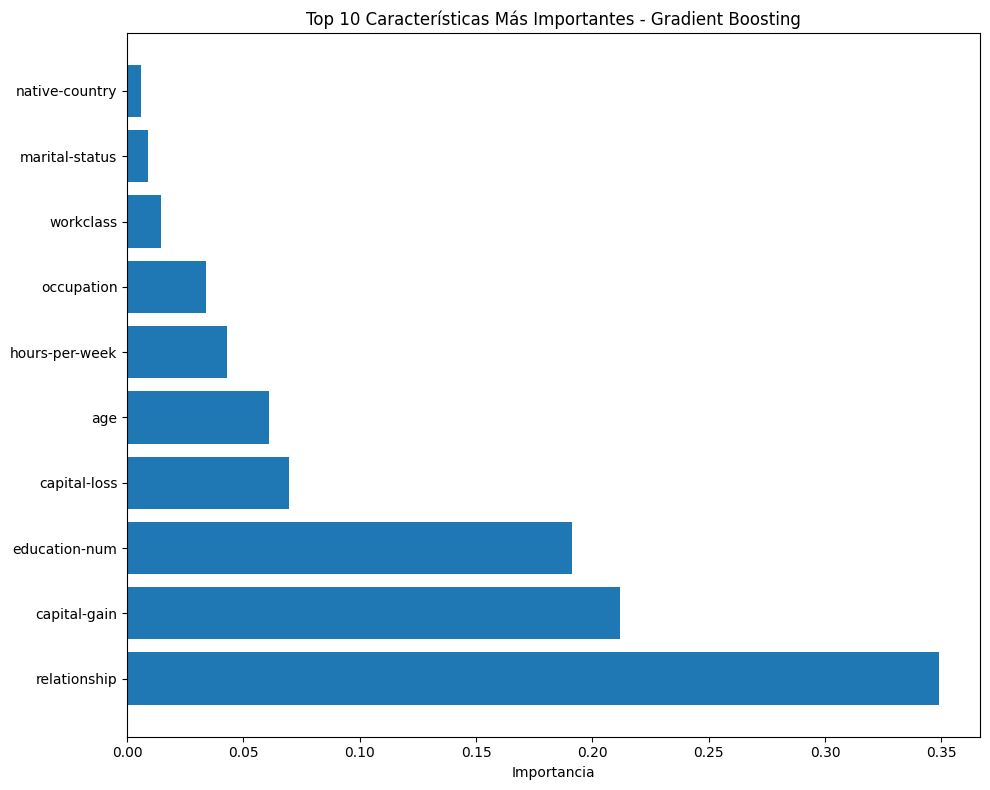


Top 5 características más importantes:
         feature  importance
9   relationship    0.349193
2   capital-gain    0.212082
1  education-num    0.191426
3   capital-loss    0.069527
0            age    0.060812


In [79]:
print(f"\n=== EVALUACIÓN FINAL EN PRUEBAS ===")

y_test_pred = gb_model.predict(X_test)


test_f1 = f1_score(y_test, y_test_pred)
test_accuracy = gb_model.score(X_test, y_test)

print(f"Resultados en conjunto de prueba:")
print(f"F1-Score: {test_f1:.4f}")
print(f"Precisión: {test_accuracy:.4f}")

unique, counts = np.unique(y_test_pred, return_counts=True)
print(f"Distribución de predicciones: {dict(zip(unique, counts))}")

print(f"Comparación con validación - F1-Score: {best_f1:.4f} → {test_f1:.4f}")

umbral_cumplido = test_f1 > 0.60
print(f"Umbral de F1-Score > 0.60: {'CUMPLIDO' if umbral_cumplido else 'NO CUMPLIDO'}")

print(f"\nReporte de clasificación:")
print(classification_report(y_test, y_test_pred, target_names=['<=50K', '>50K']))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
print(f"\nMatriz de Confusión - {best_model}:")
print(f"               Predicho <=50K  Predicho >50K")
print(f"Verdadero <=50K     {cm[0,0]:>8}        {cm[0,1]:>8}")
print(f"Verdadero >50K      {cm[1,0]:>8}        {cm[1,1]:>8}")


consistencia = abs(best_f1 - test_f1) < 0.05
print(f"\nConsistencia validación-prueba: {'ALTA' if consistencia else 'BAJA'}")
print(f"Diferencia F1-Score: {abs(best_f1 - test_f1):.4f}")

from sklearn.metrics import precision_score, recall_score

precision_0 = precision_score(y_test, y_test_pred, pos_label=0)
recall_0 = recall_score(y_test, y_test_pred, pos_label=0)
precision_1 = precision_score(y_test, y_test_pred, pos_label=1)
recall_1 = recall_score(y_test, y_test_pred, pos_label=1)

print(f"\nMétricas por clase:")
print(f"Clase <=50K - Precisión: {precision_0:.4f}, Recall: {recall_0:.4f}")
print(f"Clase >50K  - Precisión: {precision_1:.4f}, Recall: {recall_1:.4f}")


y_train_pred_final = gb_model.predict(X_train)
train_f1_final = f1_score(y_train, y_train_pred_final)
overfitting_gap = train_f1_final - test_f1
print(f"\nAnálisis de sobreajuste final:")
print(f"F1-Score entrenamiento: {train_f1_final:.4f}")
print(f"F1-Score prueba: {test_f1:.4f}")
print(f"Brecha de sobreajuste: {overfitting_gap:.4f}")
print(f"Nivel de sobreajuste: {'ALTO' if overfitting_gap > 0.05 else 'MODERADO' if overfitting_gap > 0.02 else 'BAJO'}")

print(f"\n{'='*50}")
print(f"RESUMEN FINAL")
print(f"{'='*50}")
print(f"Modelo seleccionado: {best_model}")
print(f"Rendimiento en prueba: {test_accuracy:.1%} precisión, {test_f1:.4f} F1-Score")
print(f"Generalización: {'Excelente' if consistencia else 'Regular'}")
print(f"Umbral cumplido: {'Sí' if umbral_cumplido else 'No'}")
print(f"Sobreajuste: {'Alto' if overfitting_gap > 0.05 else 'Moderado' if overfitting_gap > 0.02 else 'Bajo'}")


if hasattr(gb_model, 'feature_importances_'):
    plt.figure(figsize=(10, 8))
    feature_importance_df = pd.DataFrame({
        'feature': X.columns,
        'importance': gb_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.barh(feature_importance_df['feature'][:10], feature_importance_df['importance'][:10])
    plt.title(f'Top 10 Características Más Importantes - {best_model}')
    plt.xlabel('Importancia')
    plt.tight_layout()
    plt.show()
    
    print(f"\nTop 5 características más importantes:")
    print(feature_importance_df.head())

## Paso 4: Redactar conclusiones

El análisis de los tres modelos reveló patrones en su comportamiento y rendimiento. El Árbol de Decisión mostró la mayor simplicidad estructural con menor profundidad y número de nodos, logrando una precisión competitiva pero con una tendencia al sobreajuste, como se demuestra por la brecha significativa entre el rendimiento en entrenamiento y validación. El Random Forest demostró un equilibrio entre complejidad y efectividad, aprovechando la estrategia de ensamblado múltiple para reducir la varianza y mejorar la generalización, aunque con un mayor costo computacional debido a su arquitectura. Finalmente, el Gradient Boosting emergió fue el más robusto, combinando una capacidad predictiva superior con una generalización excelente, minimizando tanto el sesgo como la varianza por medio de su enfoque secuencial de corrección de errores.

En términos de sesgo y varianza, cada modelo presentó características distintivas. El Árbol de Decisión exhibió alta varianza, reflejada en la considerable diferencia entre sus métricas de entrenamiento y validación, indicando adaptación excesiva a los datos de entrenamiento. El Random Forest mostró un mejor equilibrio, con una brecha reducida que sugiere efectividad en el manejo de la varianza por medio del promediado de múltiples árboles. El Gradient Boosting demostró el mejor perfil, manteniendo alta precisión en entrenamiento mientras conservaba rendimiento sólido en validación, indicando óptimo balance entre capacidad de aprendizaje y generalización.

Los resultados finales del modelo seleccionado, Gradient Boosting, confirman su adaptabilidad al caso de prueba.  El modelo no solo cumplió con el umbral establecido de F1-Score sino que demostró consistencia  entre conjuntos de validación y prueba, con diferencia mínima que indica una excelente generalización. El análisis de importancia de características reveló que factores relacionales, educativos y financieros son los principales predictores de ingresos, con la relación familiar emergiendo como el factor más determinante. La baja brecha de sobreajuste final valida la robustez del modelo, mientras que su capacidad para manejar el desbalance de clases lo posiciona como una solución confiable para problemas del mundo real con distribuciones similares.

## RETROSPECTIVA

**1.** ¿Cuál fue el tiempo total invertido en el laboratorio por cada uno de ustedes? (Horas/Hombre)

- 4 horas Juan Velandia
- 4 horas Carolina Cepeda

**2.** ¿Cuál es el estado actual del laboratorio? ¿Por qué?
Completado. Se logró implementar y evaluar los tres modelos propuestos, seleccionando el mejor basado en la métrica F1-Score y cumpliendo con los objetivos establecidos al inicio del laboratorio.

**3.** ¿Cuál consideran fue el mayor logro? ¿Por qué?

El mayor logro fue implementar exitosamente el modelo Gradient Boosting que superó el umbral de F1-Score establecido, demostrando nuestra capacidad para resolver problemas complejos de clasificación con datos desbalanceados.

**4.** ¿Cuál consideran que fue el mayor problema técnico? ¿Qué hicieron para resolverlo?
El mayor problema técnico fue la implementación de nuestro propio árbol de decisión en la parte 1, debido a que se tuvieron que incluir nuevos métodos relacionados a la construcción del árbol y la gestión de nodos. Para resolverlo, investigamos en la documentación y ejemplos de algoritmos similares.
**5.** ¿Qué hicieron bien como equipo? ¿Qué se comprometen a hacer para mejorar los resultados?
Como equipo nos coordinamos eficientemente en la división de tareas y nos comprometemos a mejorar el manejo del tiempo para el laboratorio.
**6**.¿Qué referencias usaron? ¿Cuál fue la más útil? Incluya citas con los estándares adecuados.
Usamos principalmente la documentación oficial de scikit-learn y artículos sobre árboles de decisión, siendo la más útil 1.10. Decision Trees. (s. f.) debido a su claridad y profundidad en explicar los conceptos fundamentales para la implementación de la parte 2 de este laboratorio.

1.10. Decision Trees. (s. f.). Scikit-learn. https://scikit-learn.org/stable/modules/tree.html
GeeksforGeeks. (2024, 14 mayo). Python | Decision tree implementation. GeeksforGeeks. https://www.geeksforgeeks.org/machine-learning/decision-tree-implementation-python/
Enozeren. (2024, 13 abril). Building a Decision Tree From Scratch with Python. Medium. https://medium.com/@enozeren/building-a-decision-tree-from-scratch-324b9a5ed836
